In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset = pd.read_csv("3Electric and Alternative Fuel Charging Stations.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_12048\3542126059.py:1: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("3Electric and Alternative Fuel Charging Stations.csv")


In [5]:
# Configura la opción de visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)

Durante el proceso de selección de características para nuestro análisis, se llevaron a cabo decisiones estratégicas para centrar el estudio en información clave y relevante, eliminando aquellas columnas que presentaban ambigüedad, inespecificidad o aportaban poca relevancia al objetivo del análisis. La elección de las columnas seleccionadas se basó en la necesidad de optimizar y garantizar la interpretación significativa de los resultados obtenidos.

La atención se centró en aquellas variables que ofrecen una visión más detallada y esclarecedora de la distribución de estaciones de carga, sus características específicas y su impacto potencial en la adopción de vehículos con combustibles alternativos.

During the feature selection process for our analysis, strategic decisions were made to focus the study on key and relevant information, eliminating columns that displayed ambiguity, lack of specificity, or contributed little relevance to the analysis's objective. The choice of selected columns was based on the need to optimize and ensure meaningful interpretation of the results.

Attention was directed towards variables that provide a more detailed and enlightening insight into the distribution of charging stations, their specific characteristics, and their potential impact on the adoption of alternative fuel vehicles.

In [13]:
df = dataset[["Fuel Type Code", "Street Address", "City", "State", "Status Code", 
                     "Groups With Access Code", "Access Days Time", "BD Blends", 
                     "NG Fill Type Code", "NG PSI", "Latitude", "Longitude", 
                     "Open Date", "NG Vehicle Class", "E85 Blender Pump", 
                     "EV Connector Types", 
                     "CNG Storage Capacity"]]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           70406 non-null  object 
 1   Street Address           70405 non-null  object 
 2   City                     70406 non-null  object 
 3   State                    70406 non-null  object 
 4   Status Code              70406 non-null  object 
 5   Groups With Access Code  70406 non-null  object 
 6   Access Days Time         66628 non-null  object 
 7   BD Blends                1217 non-null   object 
 8   NG Fill Type Code        1603 non-null   object 
 9   NG PSI                   1597 non-null   object 
 10  Latitude                 70406 non-null  float64
 11  Longitude                70406 non-null  float64
 12  Open Date                69310 non-null  object 
 13  NG Vehicle Class         1780 non-null   object 
 14  E85 Blender Pump      

Dominio de Vehículos Eléctricos (ELEC):

Representa la mayoría de las estaciones de carga, con un impresionante 86.5%.
La alta proporción sugiere un crecimiento y aceptación significativos de los vehículos eléctricos en la zona cubierta por los datos.
Presencia de Combustibles Alternativos:

E85 (etanol) contribuye con un 6.4%, lo que indica cierto grado de diversidad en los combustibles alternativos utilizados en las estaciones de carga.
Propano (LPG) y Gas Natural Comprimido (CNG) tienen participaciones similares de alrededor del 2.7% y 2.3%, respectivamente.
Biodiesel (BD) y GNL:

Biodiesel (BD) representa el 1.7%, mientras que Gas Natural Licuado (LNG) y Hidrógeno (HY) tienen participaciones más bajas de aproximadamente el 0.2% cada uno.
Estas opciones menos comunes sugieren una infraestructura en desarrollo para vehículos que utilizan estos combustibles.
Enfoque Sostenible y Ambiental:

La predominancia de opciones eléctricas y etanol puede indicar una creciente preferencia por vehículos más sostenibles y amigables con el medio ambiente.
En conjunto, la distribución de tipos de combustibles sugiere una tendencia hacia la electrificación, pero también se observa una diversidad que puede ser relevante para la transición hacia fuentes de energía más limpias y sostenibles.

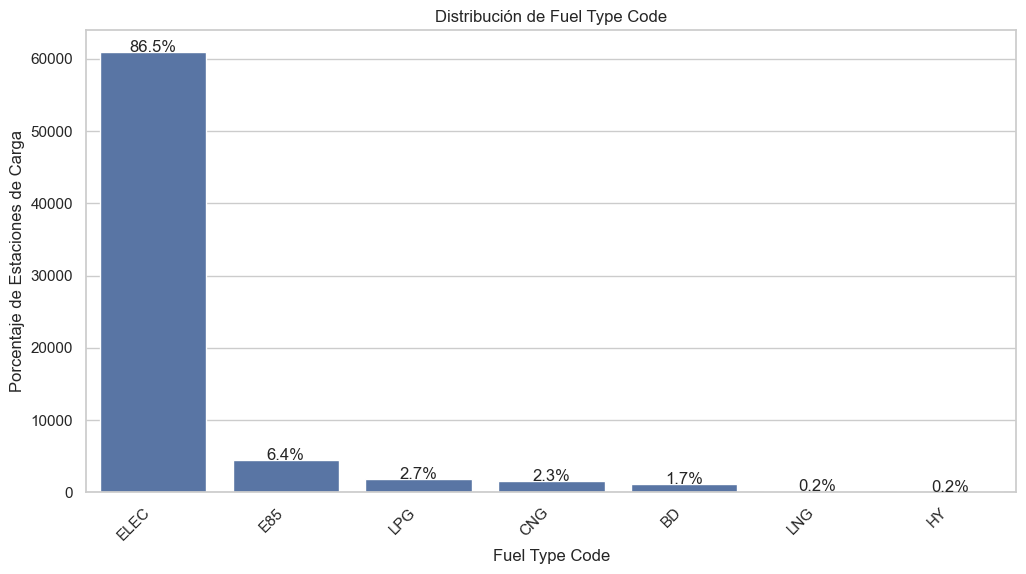

In [8]:
# Configura el estilo para los gráficos 
sns.set(style="whitegrid")

# Gráfico de barras para la distribución de Fuel Type Code con porcentajes
plt.figure(figsize=(12, 6))
total_stations = len(df)  # Número total de estaciones

# Utilizamos countplot para contar y mostrar porcentajes
sns.countplot(data=df, x='Fuel Type Code', order=df['Fuel Type Code'].value_counts().index)

# Calcula y muestra porcentajes en las barras
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height/total_stations:.1%}', ha='center')

plt.title('Distribución de Fuel Type Code')
plt.xlabel('Fuel Type Code')
plt.ylabel('Porcentaje de Estaciones de Carga')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mayor claridad
plt.show()

Las ciudades de Los Ángeles y San Diego, en California, junto con Montreal, en Canadá, se destacan por tener el mayor número de estaciones de energía alternativa.

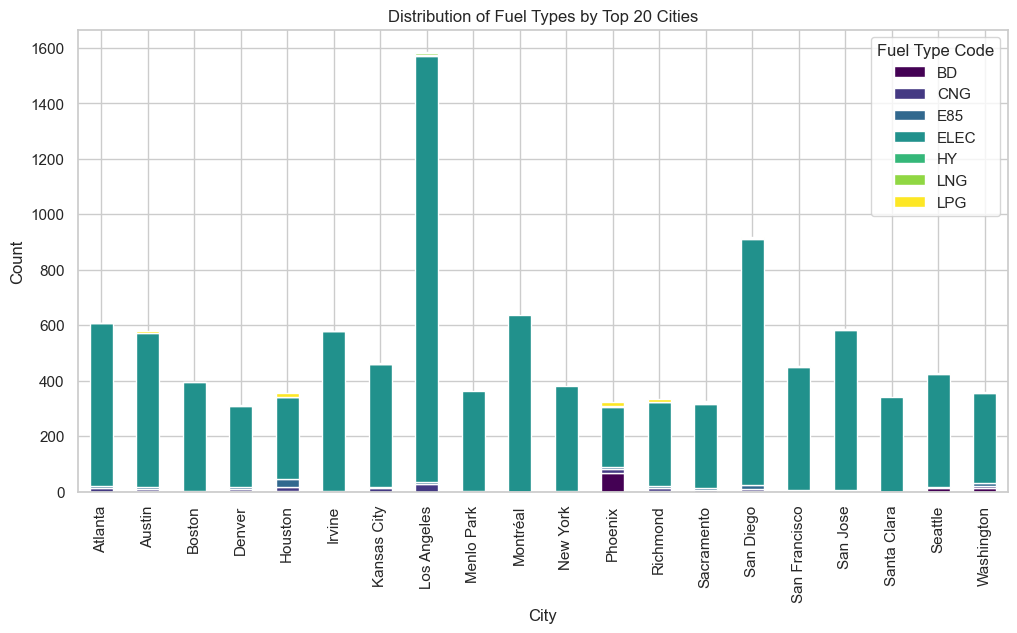

In [8]:
# Obtiene las 20 ciudades principales por cantidad de estaciones
top_cities = df['City'].value_counts().head(20).index

# Filtra el DataFrame solo para incluir las 20 ciudades principales
df_top_cities = df[df['City'].isin(top_cities)]

# Cuenta la frecuencia de cada tipo de combustible por ciudad en el DataFrame filtrado
fuel_city_counts_top = df_top_cities.groupby(['City', 'Fuel Type Code']).size().unstack()

# Crea un gráfico de barras agrupadas
fuel_city_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types by Top 20 Cities')
plt.legend(title='Fuel Type Code')

plt.show()

California lidera con amplia ventaja en la adopción de fuentes de energía alternativas, seguido por el estado de Nueva York.

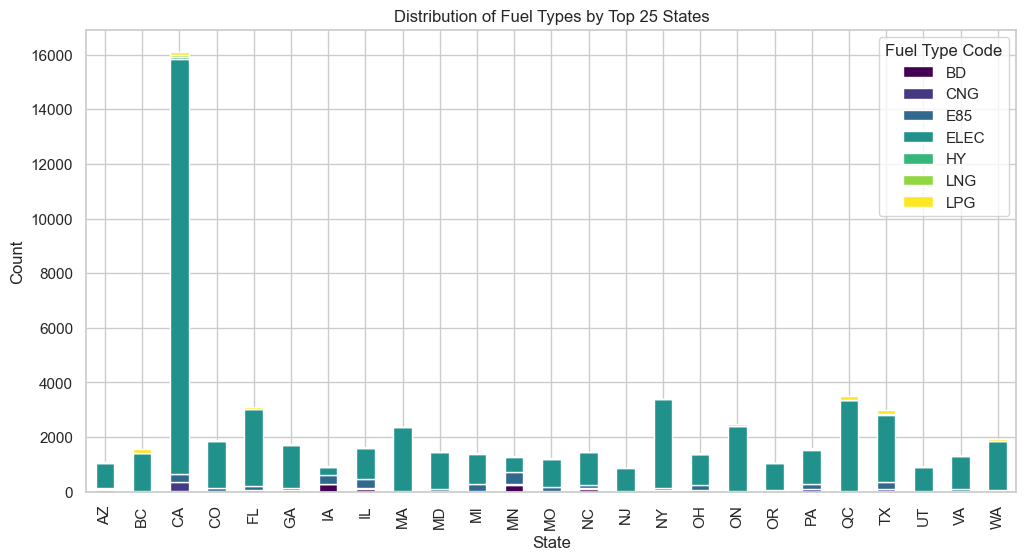

In [11]:
# Obtiene las 20 principales entidades (estados) por cantidad de estaciones
top_states = df['State'].value_counts().head(25).index

# Filtra el DataFrame solo para incluir las 20 principales entidades (estados)
df_top_states = df[df['State'].isin(top_states)]

# Cuenta la frecuencia de cada tipo de combustible por estado en el DataFrame filtrado
fuel_state_counts_top = df_top_states.groupby(['State', 'Fuel Type Code']).size().unstack()

# Crea un gráfico de barras agrupadas
fuel_state_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types by Top 25 States')
plt.legend(title='Fuel Type Code')

plt.show()

El gráfico evidencia que California es el líder indiscutible en la adopción de estaciones de carga eléctrica para vehículos.

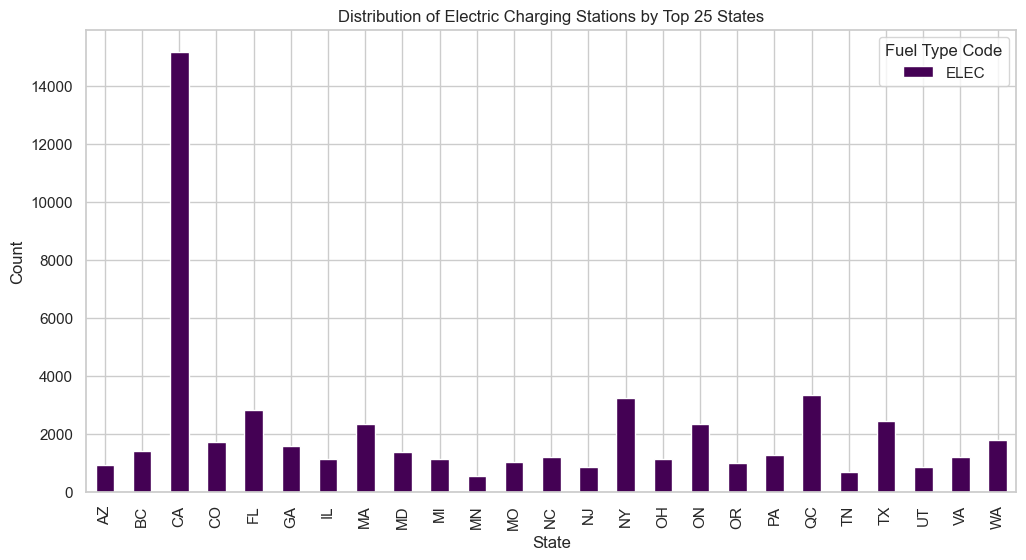

In [8]:
# Filtra el DataFrame solo para incluir las estaciones de carga eléctrica (ELEC)
df_elec = df[df['Fuel Type Code'] == 'ELEC']

# Obtiene las 20 principales entidades (estados) por cantidad de estaciones eléctricas
top_states_elec = df_elec['State'].value_counts().head(25).index

# Filtra el DataFrame solo para incluir las 20 principales entidades (estados) con estaciones eléctricas
df_top_states_elec = df_elec[df_elec['State'].isin(top_states_elec)]

# Cuenta la frecuencia de cada tipo de combustible por estado en el DataFrame filtrado (solo ELEC)
fuel_state_counts_top_elec = df_top_states_elec.groupby(['State', 'Fuel Type Code']).size().unstack()

# Crea un gráfico de barras agrupadas
fuel_state_counts_top_elec.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Electric Charging Stations by Top 25 States')
plt.legend(title='Fuel Type Code')

plt.show()


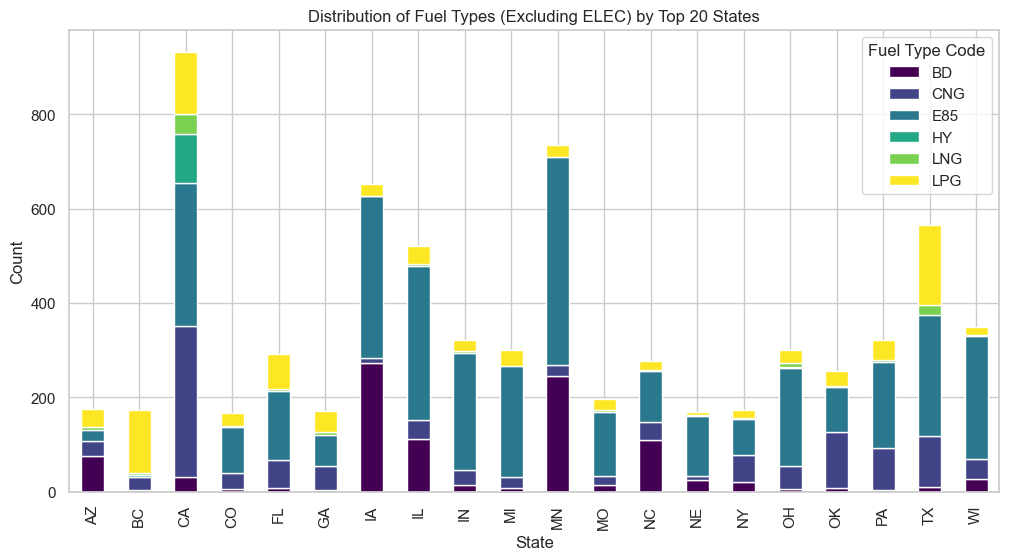

In [7]:
# Filtra el DataFrame para excluir las estaciones de carga de electricidad (ELEC)
df_no_elec = df[df['Fuel Type Code'] != 'ELEC']

# Obtiene las 20 principales entidades (estados) por cantidad de estaciones (sin incluir ELEC)
top_states_no_elec = df_no_elec['State'].value_counts().head(20).index

# Filtra el DataFrame sin ELEC para incluir solo las 20 principales entidades (estados)
df_top_states_no_elec = df_no_elec[df_no_elec['State'].isin(top_states_no_elec)]

# Cuenta la frecuencia de cada tipo de combustible por estado en el DataFrame filtrado (sin ELEC)
fuel_state_counts_top_no_elec = df_top_states_no_elec.groupby(['State', 'Fuel Type Code']).size().unstack()

# Crea el gráfico de barras agrupadas
fuel_state_counts_top_no_elec.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types (Excluding ELEC) by Top 20 States')
plt.legend(title='Fuel Type Code')

plt.show()


El análisis de la distribución porcentual de los diferentes tipos de combustibles en las estaciones de carga es el siguiente:

ELEC (Electricidad): 86.51%

Electricidad es la fuente de energía dominante en las estaciones de carga, representando más del 86% del total.
Este alto porcentaje sugiere una adopción significativa de vehículos eléctricos en comparación con otros tipos de combustibles alternativos.
E85 (85% de etanol): 6.40%

Aunque en menor proporción que la electricidad, el E85 tiene una presencia considerable.
Puede indicar cierto interés en los biocombustibles, aunque no tan prevalente como la electricidad.
LPG (Gas Licuado de Petróleo): 2.65%

El Gas Licuado de Petróleo ocupa un espacio significativo, pero menos común que los dos anteriores.
Es probable que exista una demanda para vehículos que utilicen gas licuado como fuente de energía.
CNG (Gas Natural Comprimido): 2.32%

El Gas Natural Comprimido tiene una representación similar al LPG.
Puede indicar una infraestructura creciente para vehículos que utilizan gas natural.
BD (Biodiesel): 1.73%

El Biodiesel tiene una presencia menor en comparación con otras fuentes de energía.
Puede haber una adopción limitada de vehículos que utilizan biodiesel en comparación con otras tecnologías.
LNG (Gas Natural Licuado): 0.22%

El Gas Natural Licuado tiene una presencia mínima en las estaciones de carga.
Puede sugerir una adopción limitada de vehículos que utilizan gas natural licuado.
HY (Hidrógeno): 0.17%

El hidrógeno tiene la menor representación entre los tipos de combustibles.
La infraestructura para vehículos de hidrógeno puede estar en las etapas iniciales de desarrollo.

In [11]:
# Obtiene la frecuencia de cada categoría en 'Fuel Type Code'
fuel_type_counts = df['Fuel Type Code'].value_counts()

# Calcula los porcentajes
fuel_type_percentages = fuel_type_counts / len(df) * 100

# Crear un DataFrame con los resultados
fuel_type_table = pd.DataFrame({
    'Fuel Type': fuel_type_percentages.index,
    'Percentage': fuel_type_percentages.values
})

# Ordenar la tabla por porcentaje en orden descendente
fuel_type_table = fuel_type_table.sort_values(by='Percentage', ascending=False)

# Mostrar la tabla
print(fuel_type_table)

  Fuel Type  Percentage
0      ELEC   86.508252
1       E85    6.402863
2       LPG    2.651763
3       CNG    2.316564
4        BD    1.729966
5       LNG    0.224413
6        HY    0.166179


C:\Users\DELL\AppData\Local\Temp\ipykernel_5944\538022140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_5944\538022140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open Year'] = df['Open Date'].dt.year


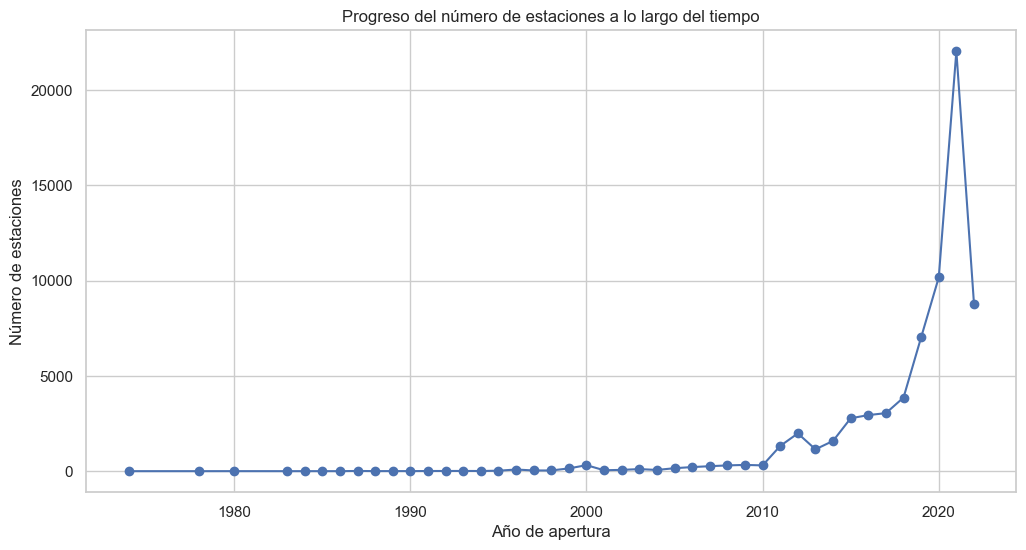

In [11]:
# Convierte la columna 'Open Date' al formato de fecha
df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')

# Extrae el año de la columna 'Open Date'
df['Open Year'] = df['Open Date'].dt.year

# Cuenta el número de estaciones abiertas por año
stations_by_year = df['Open Year'].value_counts().sort_index()

# Crea un gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(stations_by_year.index, stations_by_year.values, marker='o', linestyle='-')
plt.xlabel('Año de apertura')
plt.ylabel('Número de estaciones')
plt.title('Progreso del número de estaciones a lo largo del tiempo')
plt.grid(True)
plt.show()

El análisis del conteo de estaciones de carga por año desde 2010 muestra un claro aumento en la implementación de estaciones de carga para vehículos eléctricos. Aquí hay algunas observaciones clave:

Crecimiento Sostenido: A lo largo de los años, se observa un crecimiento sostenido en el número de estaciones de carga desde 2010 hasta 2022.

Aceleración en los Últimos Años: Se destaca un aumento significativo a partir de 2019, con un fuerte crecimiento en 2020 y 2021. Este aumento puede indicar un interés creciente en la infraestructura de carga para vehículos eléctricos.

2021 como un Año de Auge: El año 2021 muestra un aumento drástico, más que duplicando la cantidad de estaciones de carga en comparación con el año anterior (2020).

Posible Influencia de Políticas y Mercado: El aumento en la adopción de estaciones de carga puede estar relacionado con políticas gubernamentales, incentivos y la creciente demanda del mercado de vehículos eléctricos

In [12]:
# Convierte la columna 'Open Date' a datetime
df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')

# Crear una nueva columna 'Year' con el año de apertura
df['Year'] = df['Open Date'].dt.year

# Filtrar las estaciones abiertas desde 2010 en adelante
df_since_2010 = df[df['Year'] >= 2010]

# Contar la cantidad de estaciones por año
station_count_by_year = df_since_2010['Year'].value_counts().sort_index()

# Crear un DataFrame con los resultados
station_count_by_year_df = pd.DataFrame({'Year': station_count_by_year.index, 'Station Count': station_count_by_year.values})

# Mostrar la tabla
print(station_count_by_year_df)

      Year  Station Count
0   2010.0            305
1   2011.0           1325
2   2012.0           1984
3   2013.0           1148
4   2014.0           1589
5   2015.0           2778
6   2016.0           2944
7   2017.0           3048
8   2018.0           3864
9   2019.0           7026
10  2020.0          10170
11  2021.0          22048
12  2022.0           8792


C:\Users\DELL\AppData\Local\Temp\ipykernel_3148\3472916233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3148\3472916233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Open Date'].dt.year


Este gráfico ejemplifica la evolución en la implementación de estaciones de energía alternas, el primero hace referencia a la implementación electrica y el segundo a las demas fuentes de energía. 

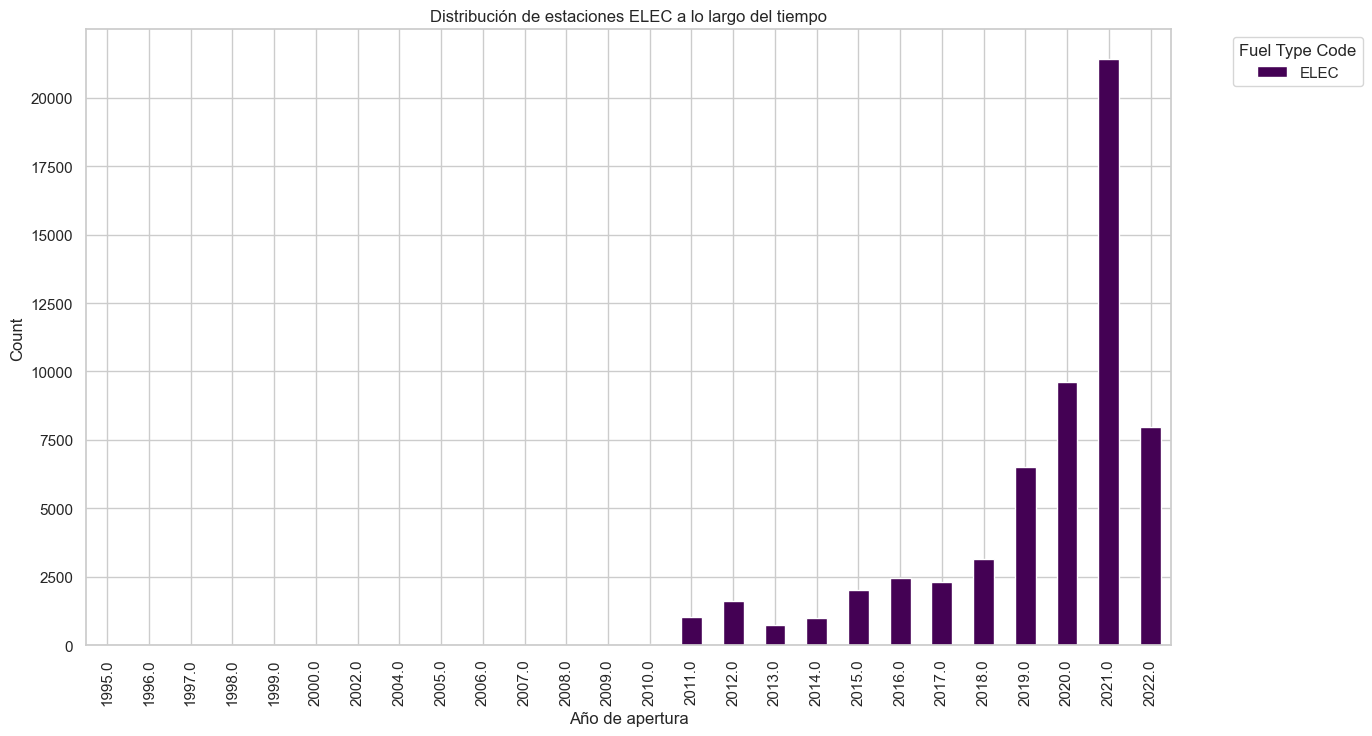

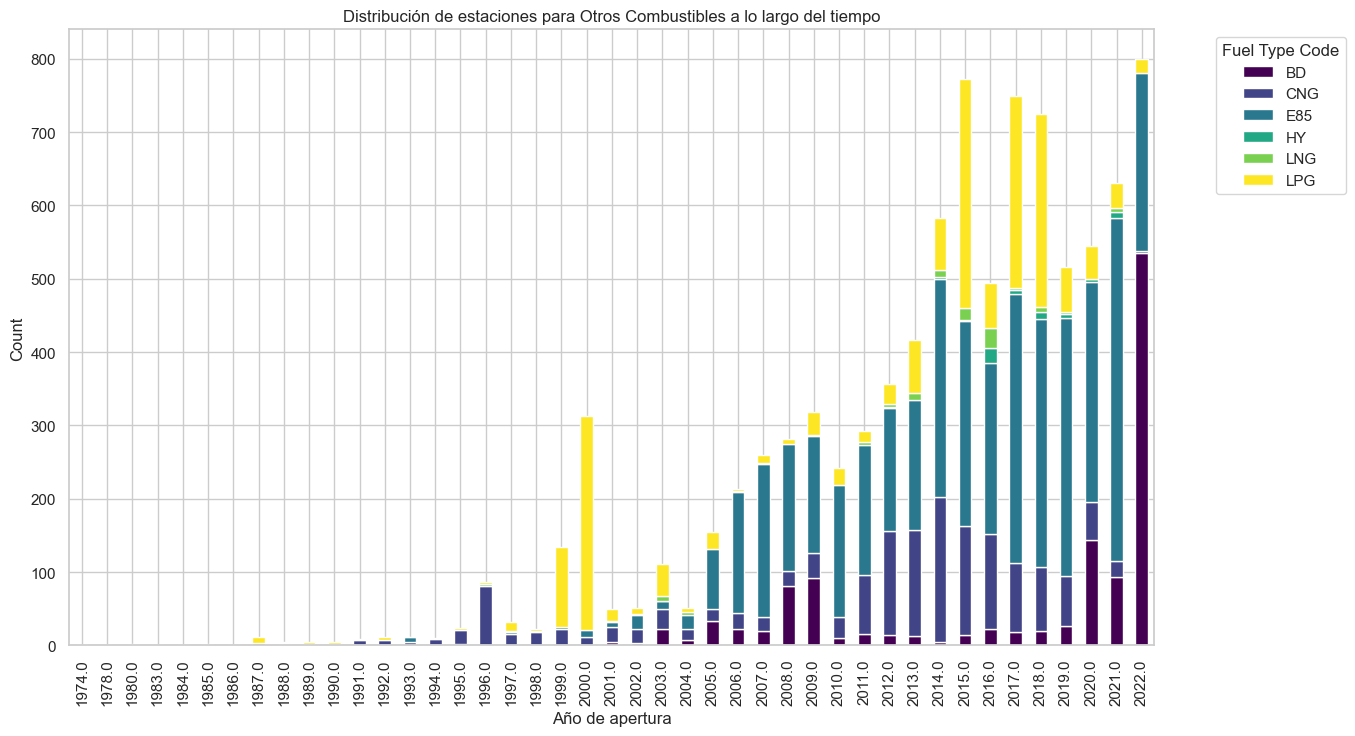

In [15]:
# Filtrar por ELEC
df_elec = df[df['Fuel Type Code'] == 'ELEC']

# Filtrar por el resto de combustibles
df_other_fuels = df[df['Fuel Type Code'] != 'ELEC']

# Crea gráfico para ELEC
fuel_date_counts_elec = df_elec.groupby([df_elec['Open Date'].dt.year, 'Fuel Type Code']).size().unstack()
fuel_date_counts_elec.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.xlabel('Año de apertura')
plt.ylabel('Count')
plt.title('Distribución de estaciones ELEC a lo largo del tiempo')
plt.legend(title='Fuel Type Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Crea gráfico para el resto de combustibles
fuel_date_counts_other_fuels = df_other_fuels.groupby([df_other_fuels['Open Date'].dt.year, 'Fuel Type Code']).size().unstack()
fuel_date_counts_other_fuels.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.xlabel('Año de apertura')
plt.ylabel('Count')
plt.title('Distribución de estaciones para Otros Combustibles a lo largo del tiempo')
plt.legend(title='Fuel Type Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

La categoría de vehículos que más utiliza gas natural es la de "heavy-duty", con una proporción aproximada de 6 a 1 en comparación con otras categorías. 

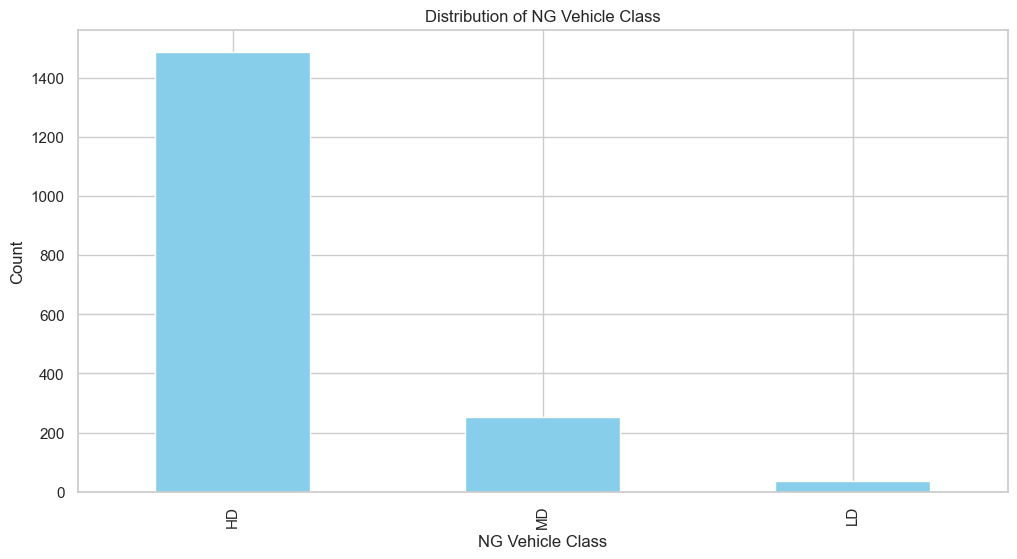

In [18]:
# Obtenemos el conteo de cada categoría en 'NG Vehicle Class'
ng_vehicle_class_counts = df['NG Vehicle Class'].value_counts()


plt.figure(figsize=(12, 6))
ng_vehicle_class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('NG Vehicle Class')
plt.ylabel('Count')
plt.title('Distribution of NG Vehicle Class')
plt.show()

En este gráfico podemos la capacidad de almacenamiento de gas natural en las distintas estaciones.

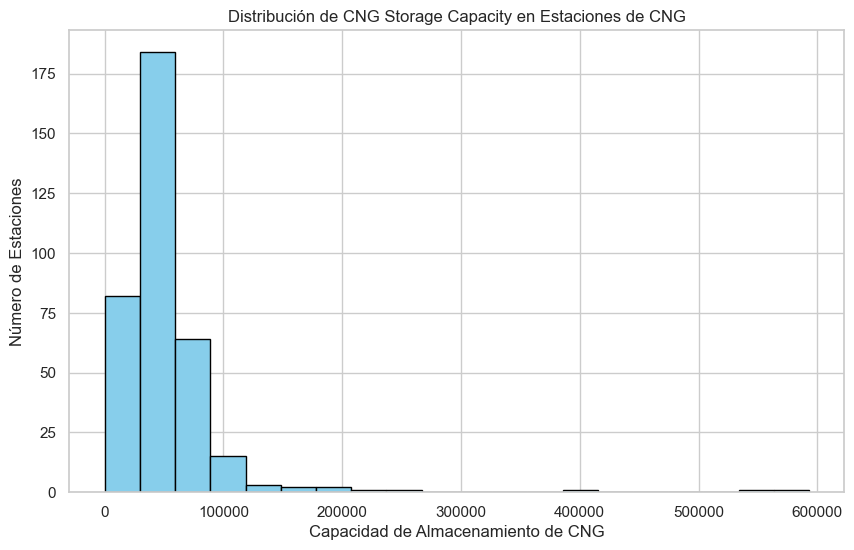

In [10]:
# Filtra el DataFrame para incluir solo las estaciones con capacidad de almacenamiento de CNG
df_cng = df[df['Fuel Type Code'] == 'CNG']

# Crear un histograma de la capacidad de almacenamiento de CNG
plt.figure(figsize=(10, 6))
plt.hist(df_cng['CNG Storage Capacity'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Capacidad de Almacenamiento de CNG')
plt.ylabel('Número de Estaciones')
plt.title('Distribución de CNG Storage Capacity en Estaciones de CNG')
plt.show()